# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

### Solution 1.1.1~1.1.3

In [1]:
#Import required packages
import numpy as np
import pandas as pd

import statistics
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #Ignore future warning to have a clear result

In [3]:
#Read the dataset
paper = pd.read_csv('data/dataset_final.csv')

In [4]:
#Check the data
paper.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...",-1;-1;3;-1;-1,3;2,1718;17889;161;8800;20766,59;1045;17;78;409,17;54;7;33;63,True
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,Baidu;Baidu;Baidu,-1;-1;-1,6;8,890;1382;9553,37;63;557,12;20;44,False
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,;International Business Machines;International...,-1;-1;-1,0,366;678;658,10;40;76,5;11;9,False


In [5]:
paper.dtypes

year                      int64
paper                    object
authors                  object
ratings                 float64
decisions                object
institution              object
csranking                object
categories               object
authors_citations        object
authors_publications     object
authors_hindex           object
arxiv                      bool
dtype: object

Based on above results, we found that:

1. The data type of 'year' is integer. It's ok and suitable for following analysis.
2. In 'author', 'insitution', they are objects consiting of authors' name and insitutions' name. It will be better if we can split them up.
3. In 'csranking', 'categories', 'authors_citations', 'authors_publications', 'authors_hindex', the number is not split. It's better if we split them up.

What we do for preprocessing the data:

1. Split 'authors', 'institution' into a python list of authors and institutions.
2. Same work is done for 'csranking', 'categories', 'authors_citations', 'authors_publications', 'authors_hindex'.
3. We transform 'decisions' into True and False.


In [6]:
#Preprocess

#authors: split them into a list of names
paper['authors'] = pd.Series(row.split(';') for row in paper.authors)

#decisions: transform into True and False
paper['decisions'] = (paper['decisions'] == 'Accept')

#institution: split them into a list of names
paper['institution'] = pd.Series(row.split(';') for row in paper.institution)

#csranking: split into a list of numbers
paper['csranking'] = pd.Series(list(map(int,t)) for t in pd.Series(row.split(';') for row in paper.csranking))

#categories: split into a list of numbers
paper['categories'] = pd.Series(list(map(int,t)) for t in pd.Series(row.split(';') for row in paper.categories))

#authors_citations: split into a list of numbers
paper['authors_citations'] = pd.Series(list(map(int,t)) for t in pd.Series(row.split(';') for row in paper.authors_citations))

#authors_publications: split into a list of numbers
paper['authors_publications'] = pd.Series(list(map(int,t)) for t in pd.Series(row.split(';') for row in paper.authors_publications))

#authors_hindex: split into a list of numbers
paper['authors_hindex'] = pd.Series(list(map(int,t)) for t in pd.Series(row.split(';') for row in paper.authors_hindex))


In [7]:
#Check the data
paper.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,"[Aman Sinha, Hongseok Namkoong, John Duchi]",9.000000,True,"[Stanford University, Stanford University, Sta...","[4, 4, 4]",[4],"[655, 904, 12908]","[42, 19, 162]","[8, 10, 42]",True
1,2018,Parametric Information Bottleneck to Optimize ...,"[Thanh T. Nguyen, Jaesik Choi]",4.666667,False,[Ulsan National Institute of Science and Techn...,"[468, 468]",[8],"[1052, 727]","[86, 88]","[16, 15]",False
2,2018,Towards Neural Phrase-based Machine Translation,"[Po-Sen Huang, Chong Wang, Sitao Huang, Dengyo...",6.666667,True,"[Microsoft, Google, University of Illinois, Ur...","[-1, -1, 3, -1, -1]","[3, 2]","[1718, 17889, 161, 8800, 20766]","[59, 1045, 17, 78, 409]","[17, 54, 7, 33, 63]",True
3,2018,Interactive Grounded Language Acquisition and ...,"[Haonan Yu, Haichao Zhang, Wei Xu]",6.333333,True,"[Baidu, Baidu, Baidu]","[-1, -1, -1]","[6, 8]","[890, 1382, 9553]","[37, 63, 557]","[12, 20, 44]",False
4,2018,A Boo(n) for Evaluating Architecture Performance,"[Ondrej Bajgar, Rudolf Kadlec, and Jan Kleindi...",4.666667,False,"[, International Business Machines, Internatio...","[-1, -1, -1]",[0],"[366, 678, 658]","[10, 40, 76]","[5, 11, 9]",False


What we found:
1. In 'authors_citations', 'authors_publications' and 'authors_hindex'. There are -1 values in them.

What we do:
1. When computing median values, we just ignore these values and compute the median for rest of them.
2. For repuation, we follow the formula to compute reputation.
3. For 'has_top_company', we only consider ["Facebook", "Google", "Microsoft", "Deepmind"]. Maybe they have a different name for same company, but we only consider their standard names.
4. For 'has_top_institution', we can select those with rank between [1,10].


In [8]:
#Create authors_citations_median
paper['authors_citations_median'] = 0
for i in paper.index:
    temp = paper.loc[i,'authors_citations']
    if -1 in paper.loc[i,'authors_citations']:
        temp.remove(-1) #remove -1 values
        paper.loc[i,'authors_citations_median'] = statistics.median(temp)
    else:
        paper.loc[i,'authors_citations_median'] = statistics.median(temp)

#Create authors_publications_median
paper['authors_publications_median'] = 0
for i in paper.index:
    temp = paper.loc[i,'authors_publications']
    if -1 in paper.loc[i,'authors_publications']:
        temp.remove(-1)
        paper.loc[i,'authors_publications_median'] = statistics.median(temp)
    else:
        paper.loc[i,'authors_publications_median'] = statistics.median(temp)

#Create authors_hindex_median
paper['authors_hindex_median'] = 0
for i in paper.index:
    temp = paper.loc[i,'authors_hindex']
    if -1 in paper.loc[i,'authors_hindex']:
        temp.remove(-1) #remove -1 values
        paper.loc[i,'authors_hindex_median'] = statistics.median(temp)
    else:
        paper.loc[i,'authors_hindex_median'] = statistics.median(temp)
        
#Create reputation
paper['reputation'] = pd.Series(math.log10(paper.loc[i,'authors_citations'][-1]/paper.loc[i,'authors_publications'][-1]+1) for i in paper.index)

#Create has_top_company
paper['has_top_company'] = 0
top_company = ["Facebook", "Google", "Microsoft", "Deepmind"]
for i in paper.index:
    if len(set(paper.loc[i,'institution'])&set(top_company))!=0:
        paper.loc[i,'has_top_company'] = 1
        
#Create has_top_institution
paper['has_top_institution'] = 0
for i in paper.index:
    if any([1<=rank<=10 for rank in paper.loc[i,'csranking']]):
        paper.loc[i,'has_top_institution'] = 1

In [9]:
paper.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
0,2018,Certifying Some Distributional Robustness with...,"[Aman Sinha, Hongseok Namkoong, John Duchi]",9.000000,True,"[Stanford University, Stanford University, Sta...","[4, 4, 4]",[4],"[655, 904, 12908]","[42, 19, 162]","[8, 10, 42]",True,904.0,42.0,10.0,1.906761,0,1
1,2018,Parametric Information Bottleneck to Optimize ...,"[Thanh T. Nguyen, Jaesik Choi]",4.666667,False,[Ulsan National Institute of Science and Techn...,"[468, 468]",[8],"[1052, 727]","[86, 88]","[16, 15]",False,889.5,87.0,15.5,0.966675,0,0
2,2018,Towards Neural Phrase-based Machine Translation,"[Po-Sen Huang, Chong Wang, Sitao Huang, Dengyo...",6.666667,True,"[Microsoft, Google, University of Illinois, Ur...","[-1, -1, 3, -1, -1]","[3, 2]","[1718, 17889, 161, 8800, 20766]","[59, 1045, 17, 78, 409]","[17, 54, 7, 33, 63]",True,8800.0,78.0,33.0,1.714100,1,1
3,2018,Interactive Grounded Language Acquisition and ...,"[Haonan Yu, Haichao Zhang, Wei Xu]",6.333333,True,"[Baidu, Baidu, Baidu]","[-1, -1, -1]","[6, 8]","[890, 1382, 9553]","[37, 63, 557]","[12, 20, 44]",False,1382.0,63.0,20.0,1.258896,0,0
4,2018,A Boo(n) for Evaluating Architecture Performance,"[Ondrej Bajgar, Rudolf Kadlec, and Jan Kleindi...",4.666667,False,"[, International Business Machines, Internatio...","[-1, -1, -1]",[0],"[366, 678, 658]","[10, 40, 76]","[5, 11, 9]",False,658.0,40.0,9.0,0.984882,0,0


### Solution 1.1.4 Discuss part (handelling with -1 values)
1. when computing median, we just ignore -1 values in the list and compute median for rest of the list.

We also create craze feature here.

In [10]:
#Create crazy feature
paper['crazy'] = 0
for i in paper.index:
    if paper.loc[i,'ratings']>4.96:
        paper.loc[i,'crazy'] = 9 - paper.loc[i,'ratings']
    else:
        paper.loc[i,'crazy'] = - paper.loc[i,'ratings']

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


### Solution 1.2

We use train_test_split functions provided in sklearn.model_selection to split our dataset. We set shuffle as 'True' and test_size as 0.3. So we can split the data into a trainning set (70%) and a testing set (30%).

In [11]:
#Randomly split the dataset
#Shuffle the dataset
rs_train, rs_test = train_test_split(paper,shuffle=True,test_size=0.3)

To longitudinally split the data, we selct data from 2018 and 2019 for the training set. And we select the data from 2020 as the testing set.

In [12]:
#Longitudinally split the dataset
ls_train = paper.loc[(paper['year'] ==2018)|(paper['year']==2019)]
ls_test = paper.loc[paper['year']==2020]

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

### Solution 1.3.1

In [13]:
#Random Split Case
features = ['authors_publications_median','authors_citations_median','authors_hindex_median','reputation']
rs_train_y = rs_train['ratings'].to_numpy()
rs_train_X = rs_train[features].to_numpy()
rs_test_y = rs_test['ratings'].to_numpy()
rs_test_X = rs_test[features].to_numpy()

rs_reg = linear_model.LinearRegression()
rs_reg.fit(rs_train_X,rs_train_y)
rs_test_pred = rs_reg.predict(rs_test_X)
print("Random split R^2 = {}".format(r2_score(rs_test_y,rs_test_pred)))

Random split R^2 = 0.10135535380529215


In [14]:
#Longitudinally Split Case
ls_train_y = ls_train['ratings'].to_numpy()
ls_train_X = ls_train[features].to_numpy()
ls_test_y = ls_test['ratings'].to_numpy()
ls_test_X = ls_test[features].to_numpy()

ls_reg = linear_model.LinearRegression()
ls_reg.fit(ls_train_X,ls_train_y)
ls_test_pred = ls_reg.predict(ls_test_X)
print("Longitudinally split R^2 = {}".format(r2_score(ls_test_y,ls_reg.predict(ls_test_X))))

Longitudinally split R^2 = -0.23969385314865432


Here, the $R^2$ for Random split is 0.101. The $R^2$ for longitudinal split is -0.240.

### Solution 1.3.2

It seems that random split has better results than longitudinal split. The reason why they have different results is following:

1. Random split has larger train dataset. In radom split, there are 2,979 records in the dataset which takes up 70% in the whole dataset. However, in longitudinally split, there are only 2,204 records, which takes up about 51.8%.
2. For random split, the train dataset consists data from 2018 to 2020. However in longitudinal split, the train dataset consist only data from 2018 to 2019. And in this case, we are trying to predict for year 2020.

For longitudinal split, the $R^2$ score is negative. This means that this model fits poorly. And this model is worse than a horizontal line (which refers to prediction by using average value.)

### Solution 1.3.3

Plot the distribution of residual is easy. Here, to estimate the probability that our prediction is off by more than 2-points. There are two ways of thinking about it.
1. We consider probability as the average of array '(np.absolute(rs_residual)>2).astype(int)'. And we consider this array as the input of computing confidence interval.
2. We will shuffle the data 1000 times. And we train and test the model 1000 times. We will get residual each time and compute the probability of our prediction is off by more than 2-points. Then we have 1000 such probability and compute the estimate for probability.

#### Solution 1.3.3 Method 1 to compute estimate and confidence interval

In this way, we consider probability as the average of array '(np.absolute(rs_residual)>2).astype(int)'. And we consider this array as the input of computing confidence interval.

In [15]:
#Define the function to calculate confidence interval
#We comput confidence interval using t t-distribution
def CI_Calculate(data,confidence):
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = stats.sem(data) * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, (mean-h,mean+h)

#Another way to compute the bootstrap CI is here, we will use this way in the following analysis
def bootstrap_CI(data, nbr_draws,confidence):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return (np.nanpercentile(means, 100*(1-confidence)/2),np.nanpercentile(means, 100*(1+confidence)/2))

In [16]:
#Compute residual, probability and confidence interval
rs_residual = rs_test_y-rs_test_pred
CI_1 = bootstrap_CI((np.absolute(rs_residual)>2).astype(int),1000,0.95) #confidence level = 0.95

In [17]:
print("estimate of probability:{:.3f}".format((np.absolute(rs_residual)>2).astype(int).mean()))
print("confidence interval with 0.95 confidence:({:.4f},{:.4f})".format(CI_1[0],CI_1[1]))

estimate of probability:0.160
confidence interval with 0.95 confidence:(0.1394,0.1793)


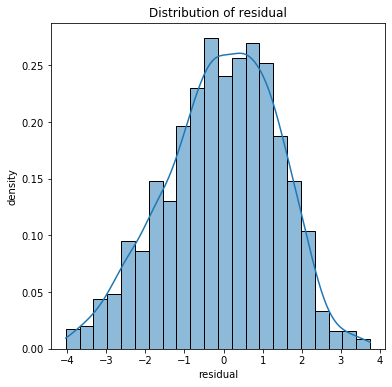

In [18]:
#Plot Distribution of residual

fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(ax=ax,data=rs_residual,stat='density',kde='true')
ax.set_title('Distribution of residual')
ax.set_xlabel('residual')
ax.set_ylabel('density')
plt.show()

Therefore, in this way, we estimate that the probability is 0.160 and the confidence interval is (0.1394,0.1793) with 95% confidence.

#### Solution 1.3.3 Method 2 to compute estimate and confidence interval

In this way,  we will shuffle the data 1000 times. And we train and test the model 1000 times. We will get residual each time and compute the probability of our prediction is off by more than 2-points. Then we have 1000 such probability and compute the estimate for probability.

In [19]:
N_bootstrap = 1000
p_array = np.zeros(N_bootstrap) #Initialize the probability array of off by 2-points

#Compute the probability each time
for i in range(N_bootstrap):
    rs_train, rs_test = train_test_split(paper,shuffle=True,test_size=0.3)
    rs_train_y = rs_train['ratings'].to_numpy()
    rs_train_X = rs_train[features].to_numpy()
    rs_test_y = rs_test['ratings'].to_numpy()
    rs_test_X = rs_test[features].to_numpy()

    rs_reg = linear_model.LinearRegression()
    rs_reg.fit(rs_train_X,rs_train_y)
    rs_test_pred = rs_reg.predict(rs_test_X)
    rs_residual = rs_test_y-rs_test_pred
    p_array[i] = np.sum(np.absolute(rs_residual)>2)/len(rs_residual)

Here, we get an array of probability of our predciton off by 2-points. We can visualize and estimate it.

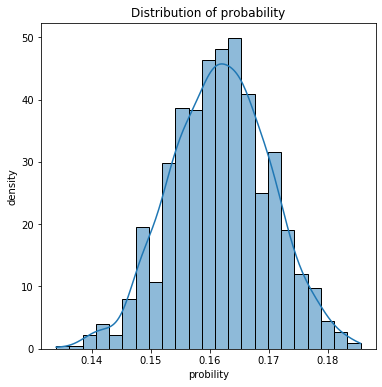

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(ax=ax,data=p_array,stat='density',kde='true')
ax.set_title('Distribution of probability')
ax.set_xlabel('probility')
ax.set_ylabel('density')
plt.show()

In [21]:
#Compute the confidence interval
p_mean,p_interval=CI_Calculate(p_array,0.95) 

In [22]:
print("estimate of probability:{:.3f}".format(p_array.mean()))
print("confidence interval with 0.95 confidence:({:.4f},{:.4f})".format(p_interval[0],p_interval[1]))

estimate of probability:0.162
confidence interval with 0.95 confidence:(0.1613,0.1623)


 Therefore, we estimate that the probability our prediction is off by more than 2-points is 0.162. And the confidence interval is $(0.1613,0.1623)$ with 95% confidence.

### Solution 1.3.4

Features we are going to add are 'arxiv','has_top_company' and 'has_top_institution'.

In [23]:
rs_train, rs_test = train_test_split(paper,shuffle=True,test_size=0.3)

features_new = ['authors_publications_median','authors_citations_median','authors_hindex_median','reputation','arxiv','has_top_company','has_top_institution']

rs_train_y = rs_train['ratings'].to_numpy()
rs_train_X = rs_train[features_new].to_numpy()
rs_test_y = rs_test['ratings'].to_numpy()
rs_test_X = rs_test[features_new].to_numpy()

rs_reg = linear_model.LinearRegression()
rs_reg.fit(rs_train_X,rs_train_y)
rs_test_pred = rs_reg.predict(rs_test_X)

print("R^2 = {:.3f}".format(r2_score(rs_test_y,rs_test_pred)))

R^2 = 0.111


$R^2$ value increased a little compared to orignal case which indicate that our new feature boost the performance of model.

### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

### Solution 1.4.1

In [24]:
#Random Split
features = ['authors_publications_median','authors_citations_median','authors_hindex_median','reputation']
rs_train_y = rs_train['ratings'].to_numpy()
rs_train_X = rs_train[features].to_numpy()
rs_test_y = rs_test['ratings'].to_numpy()
rs_test_X = rs_test[features].to_numpy()

rs_model_gbr = GradientBoostingRegressor().fit(rs_train_X,rs_train_y)

print("R^2 = {}".format(r2_score(rs_test_y,rs_model_gbr.predict(rs_test_X))))

R^2 = 0.07352070382107512


### Solution 1.4.2

We already created 'crazy' in task 1.1.

In [25]:
#Random Split
rs_train_y = rs_train['ratings'].to_numpy()
rs_train_X = rs_train['crazy'].to_numpy().reshape(-1,1)
rs_test_y = rs_test['ratings'].to_numpy()
rs_test_X = rs_test['crazy'].to_numpy().reshape(-1,1)

rs_model_gbr = GradientBoostingRegressor().fit(rs_train_X,rs_train_y)#GBR model

rs_reg = linear_model.LinearRegression()#Linear regression
rs_reg.fit(rs_train_X,rs_train_y)


print("Gradient Boosting Regressor R^2={}".format(r2_score(rs_test_y,rs_model_gbr.predict(rs_test_X))))
print("Linear Regression R^2={}".format(r2_score(rs_test_y,rs_reg.predict(rs_test_X))))

Gradient Boosting Regressor R^2=0.9999964552076687
Linear Regression R^2=0.4298985566517829


### 1.4.3 Solution

Here, Gradient boosting regression is much better than linear regression. And The $R^2$ score of Gradient Boosting Regressor is very close to 1 which means that this model almost predict completely correct. 

The reason why result is different is that gradient boosting regressor use regression tree to fit the model. And This is consistent with the 'crazy' feature. The creation of 'crazy' feature can be considered as a decision tree. However, for linear regressor, it fits the model linearly which may not get good results.

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

### Solution 1.5.1 

In this task, we will still use following features in training the model: 'authors_publications_median', 'authors_citationss_median', 'authors_hindex_median' and 'reputation'.

In [26]:
# In this task, we still use following features
features = ['authors_publications_median','authors_citations_median','authors_hindex_median','reputation']
rs_train, rs_test = train_test_split(paper,shuffle=True,test_size=0.3)
rs_train_y = rs_train['ratings'].to_numpy()
rs_train_X = rs_train[features].to_numpy()
rs_test_y = rs_test['ratings'].to_numpy()
rs_test_X = rs_test[features].to_numpy()

In [27]:
def Divide_Cross_Validation(train_X,train_y,num_folds,n_estimators=100,learning_rate=0.1):
    #Prameters: train_X, train_y, num_folds,n_estimators,learning_rate
        #train_X: a numpy array contain X of training data
        #train_y: a numpy array contain y of trainning data
        #num_folds: number of folds to preform cross-validation
        #n_estimators: number of estimators (default value = 100)
        #learning_rate: learning rate (default value = 0.1)
    #Return: an array contain R^2 values
    cv_results = cross_validate(GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate),train_X,train_y,scoring='r2',cv=num_folds)
    return cv_results['test_score']

In [28]:
#Use the modular function to do cross-validation
print(Divide_Cross_Validation(rs_train_X,rs_train_y,20))

[ 0.03865307  0.01677164  0.02106649  0.21119806  0.04366399  0.10460911
  0.10607987  0.11808814  0.10810661  0.13728098  0.04498694  0.06172746
  0.10325808  0.12230622  0.20873974  0.23036652 -0.01067913  0.15050946
  0.0971979   0.05883877]


### Solution 1.5.2


We still use orignal features here. 

features = ['authors_publications_median','authors_citations_median','authors_hindex_median','reputation']

In [29]:
list_estimators = [50,75,100,150,200,250]
list_learning_rate = [0.1,0.05,0.01]
best_n_estimators = 50
best_learning_rate = 0.1
best_score = np.NINF
mean_r2_array = np.zeros(18)
mean_r2_iter = 0

for n_estimators in list_estimators:
    for learning_rate in list_learning_rate:
        r2_array = Divide_Cross_Validation(rs_train_X,rs_train_y,20,n_estimators,learning_rate)
        mean_r2_array[mean_r2_iter] = np.mean(r2_array)
        mean_r2_iter = mean_r2_iter + 1
        if np.mean(r2_array)>best_score:
            best_n_estimators = n_estimators
            best_learning_rate = learning_rate
            best_score = np.mean(r2_array)

print("Best n_estimators:{}".format(best_n_estimators))
print("Best learning rate:{}".format(best_learning_rate))

Best n_estimators:250
Best learning rate:0.01


In [33]:
r2_interval =  bootstrap_CI(mean_r2_array,1000,0.90)
print("Mean R^2:{:.4f}".format(mean_r2_array.mean()))
print("Confidence Interval:({:.4f},{:.4f})".format(r2_interval[0],r2_interval[1]))

Mean R^2:0.0957
Confidence Interval:(0.0906,0.1002)


Here, the mean $R^2$ is 0.0829. And it's in the confidence interval (0.0906,0.1002) with 0.9 confidence.

### Solution 1.5.3

In [34]:
best_model_gbr = GradientBoostingRegressor(n_estimators = best_n_estimators,learning_rate = best_learning_rate).fit(rs_train_X,rs_train_y)
print("Best model R^2: {:.4f}".format(r2_score(rs_test_y,best_model_gbr.predict(rs_test_X))))

Best model R^2: 0.0983


### Solution 1.5.4

The test dataset is only for test. If we tune the hyper-parameters in the testing set. We are actually using the testing set to train our datset which makes no sense. Therefore, we do cross-validation in the trainning set.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

### Solution 2.1.1

In [35]:
paper_2020 = paper.loc[paper['year'] ==2020].copy()

accepted_paper_2020 = paper_2020.loc[(paper['decisions']==True)]
rejected_paper_2020 = paper_2020.loc[(paper['decisions']==False)]

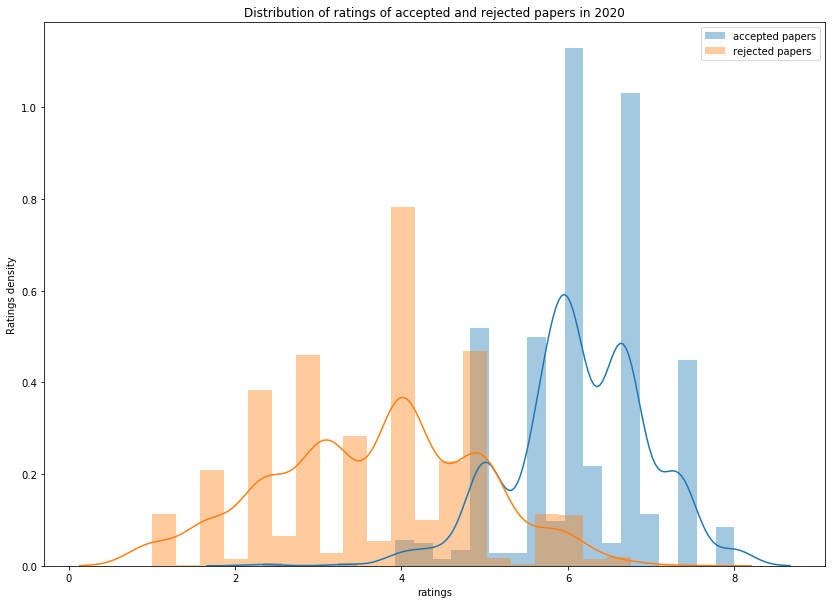

In [36]:
fig, ax = plt.subplots(figsize=(14,10))
sns.distplot(accepted_paper_2020['ratings'], hist=True, label='accepted papers',ax=ax);
sns.distplot(rejected_paper_2020['ratings'], hist=True, label='rejected papers',ax=ax)
ax.set(title='Distribution of ratings of accepted and rejected papers in 2020',xlabel='ratings', ylabel='Ratings density')
plt.legend()
plt.show()

### Solution 2.1.2 

Here, the null hypothesis is 
$$H_0: \mu_1 = \mu_2$$

And the alternative hypothesis is
$$H_A: \mu_1 \neq \mu_2$$

Since we don't know the real mean and standard deviation for their distribution and they have different sample sizes. We can use t-test to test this hypothesis. t-test is suitable for this case. 

For papers accepted in 2020. The number of observations is 629. The mean is 6.139 and the std is 0.805.

For papers rejected in 2020. The number of observations is 1423. The mean is 3.683 and the std is 1.233.

The degrees of freedoms are $$df = N_0 + N_1 -2 = 2050$$

t-statistics can be computed as follows:
$$t = \frac{\mu_0-\mu_1}{\sqrt{\frac{S_0^2}{N_0}+\frac{S_1^2}{N_1}}}$$

And there is a p-value corresponds to the t-statistics.

Finally, we get that the t-statistics is 53.562. And the p-value is 0.0. This indicates that their means are significantly different. We should reject the null hypothesis.

Following codes relates to the calculations of numbers appeared in the statistical test.

In [37]:
print("For papers accepted in 2020")
print("Numbers:{}".format(len(accepted_paper_2020)))
print("Mean value:{:.3f}".format(np.mean(accepted_paper_2020['ratings'])))
print("Standard deviation:{:.3f}".format(np.std(accepted_paper_2020['ratings'])))

For papers accepted in 2020
Numbers:629
Mean value:6.139
Standard deviation:0.805


In [38]:
print("For papers rejected in 2020")
print("Numbers:{}".format(len(rejected_paper_2020)))
print("Mean value:{:.3f}".format(np.mean(rejected_paper_2020['ratings'])))
print("Standard deviation:{:.3f}".format(np.std(rejected_paper_2020['ratings'])))

For papers rejected in 2020
Numbers:1423
Mean value:3.683
Standard deviation:1.233


In [39]:
print("degrees of freedoms:{}".format(len(accepted_paper_2020)+len(rejected_paper_2020)-2))

degrees of freedoms:2050


In [40]:
#The t-statistic
(6.139-3.683)/(math.sqrt(0.805*0.805/629+1.233*1.233/1423))

53.61199133102332

In [41]:
stats.ttest_ind(accepted_paper_2020['ratings'].to_numpy(), rejected_paper_2020['ratings'].to_numpy(), equal_var = False)

Ttest_indResult(statistic=53.56214101855919, pvalue=0.0)

### Solution 2.1.3
We are using t-test because of following reasons:

1. t-test is suitable for the null hypothesis that the two independent samples have identical average (expected) values.
2. Our samples have different sample size.
3. We don't know the actual distribution of these samples.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


### Solution 2.2.1

'ratings' feature is a continuous variable. We will do standardization before we training the data.

In [42]:
#These values are important for second question
print("Mean of ratings:{:.3f}".format(paper_2020['ratings'].mean()))
print("Std of ratings:{:.3f}".format(paper_2020['ratings'].std()))

Mean of ratings:4.436
Std of ratings:1.592


In [43]:
paper_2020['ratings'] = (paper_2020['ratings']-paper_2020['ratings'].mean())/paper_2020['ratings'].std()
paper_2020['decisions'] = paper_2020['decisions'].astype(int) #Change boolean to int

In [44]:
mod = smf.logit(formula='decisions ~ ratings', data=paper_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        16:40:57   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3803      0.129    -18.428      0.000      -2.633      -2.127
ratings        3.7693      0.

Here, we conclude that $b_0 = -2.3803$ and $b_1 = 3.7693$

### Solution 2.2.2

$$
\begin{align}
    log(\frac{p}{1-p}) &=& &b_0 + b_1 x_1 \\
                       &=& &-2.3803 + 3.7693\times\frac{(7-4.436)}{1.592} \\
                       &=& &3.69
\end{align}
$$


Then we can solve that $p = \frac{e^{3.69}}{1+e^{3.69}}=0.976$
Therefore, the probability that a paper with a score 7 will be accepted is 0.976.

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

### Solution 2.3.1

'reputation' is continuous feature. We will do standardization on this feature.

In [45]:
paper_2020['reputation'] = (paper_2020['reputation']-paper_2020['reputation'].mean())/paper_2020['reputation'].std()
paper_2020['arxiv'] = paper_2020['arxiv'].astype(int) #Change boolean to int

In [46]:
mod = smf.logit(formula='decisions ~ ratings + reputation + arxiv', data=paper_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        16:41:09   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4865      0.143    -17.419      0.000      -2.766      -2.207
ratings        3.7484      0.

### Solution 2.3.2

For our logistic regression model in 2.3.1:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + b_3x_3
$$

And we consider $x_3$ as arxiv. It's a binary variable. There are two cases here. Wether $x_3 = 0$ or $x_3 =1$

if $x_3=0$, $\exp^{b_3x_3} = 1$. If $x_3=1$,$e^{b_3x_3} = e^{b_3} = e^{0.2890} = 1.335$

In these two cases, the models are

$$
\frac{p}{1-p} = e^{b_0}e^{b_1}e^{b_2} 
$$

and 
$$
\frac{p}{1-p} = e^{b_0}e^{b_1}e^{b_2} e^{b_3}
$$

Therefore, the odds ration multiplies 1.335 when paper is seen in arxiv. And this will definitely effect statistical significance.

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

### Solution 2.4.1

In [47]:
paper_2020['arxiv:has_top_institution'] = ((paper_2020['has_top_institution'])&(paper_2020['arxiv']))
paper_2020['arxiv:has_top_institution'] = paper_2020['arxiv:has_top_institution'].astype(int)

In [48]:
#check data
paper_2020.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy,arxiv:has_top_institution
2204,2020,Pitfalls of In-Domain Uncertainty Estimation a...,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",1.400988,1,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]","[8, 1, 7, 16]",0,484.5,15.5,7.5,-0.101700,0,0,2.333333,0
2205,2020,An Inductive Bias for Distances: Neural Nets t...,"[Silviu Pitis, Harris Chan, Kiarash Jamali, Ji...",1.453324,1,"[Department of Computer Science, University of...","[18, 18, 18, 18]","[1, 10]","[15, 23, 3, 52924]","[9, 13, 3, 56]","[2, 3, 1, 22]",0,19.0,11.0,2.5,3.019851,0,0,2.250000,0
2206,2020,Stochastic AUC Maximization with Deep Neural N...,"[Mingrui Liu, Zhuoning Yuan, Yiming Ying, Tian...",0.982298,1,"[University of Iowa, University of Iowa, State...","[154, 154, 266, 154]",[9],"[238, 112, 2144, 3236]","[29, 12, 64, 187]","[9, 4, 24, 29]",1,1191.0,46.5,16.5,-0.084599,0,0,3.000000,0
2207,2020,On the interaction between supervision and sel...,"[Ryan Lowe*, Abhinav Gupta*, Jakob Foerster, D...",1.400988,1,"[McGill University, University of Montreal, Fa...","[86, 128, -1, -1, 86]",[3],"[3343, 36, 2107, 3454, 11328]","[53, 10, 58, 80, 267]","[17, 3, 19, 29, 46]",0,3343.0,58.0,19.0,0.595219,1,0,2.333333,0
2208,2020,Towards Better Understanding of Adaptive Gradi...,"[Mingrui Liu, Youssef Mroueh, Jerret Ross, Wei...",0.982298,1,"[University of Iowa, International Business Ma...","[154, -1, -1, -1, -1, -1, 154]","[5, 9]","[238, 916, 392, 108, 241, 848, 3236]","[29, 53, 12, 46, 30, 86, 187]","[9, 11, 4, 6, 6, 17, 29]",0,392.0,46.0,9.0,-0.084599,0,0,3.000000,0


In [49]:
mod = smf.logit(formula='decisions ~ ratings + reputation + arxiv + \
                has_top_institution + arxiv:has_top_institution', data=paper_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        16:41:12   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6110      0.161    -16.235      0.000      -2.

### Solution 2.4.2

For our logistic regression model in 2.4.1:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + b_3x_3 +b_4x_4 +b_5x_5
$$

And we consider $x_5$ as arxiv:has_top_institution. It's a binary variable. There are two cases here. Wether $x_5 = 0$ or $x_5 =1$

if $x_5=0$, $\exp^{b_5x_5} = 1$. If $x_5=1$,$e^{b_5x_5} = e^{b_5} = e^{0.5793} = 1.7848$

In these two cases, the models are

$$
\frac{p}{1-p} = e^{b_0}e^{b_1}e^{b_2}e^{b_3}e^{b_4}
$$

and 

$$
\frac{p}{1-p} = e^{b_0}e^{b_1}e^{b_2}e^{b_3}e^{b_4}e^{b_5}
$$

Therefore, the odds ration multiplies 1.7848 when 'arxiv:has_top_institution' is True.

This shows that arxiv and having top institutions breaks double-blind submissions. Because, if this variable is true, the odds will increase and probability will increase.

However, having only arxiv will not break double-blind submissions as it only multiplies the odds ration by $e^{1.061}=1.1119$.

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


### Solution 3.1.1

Here, we use dataframe merge method to merge dataframes.

In [67]:
propensity = pd.read_csv('data/propensity_scores.csv.gz',compression='gzip')

In [68]:
propensity.head()

,paper,propensity_score
0,Pitfalls of In-Domain Uncertainty Estimation a...,0.360486
1,An Inductive Bias for Distances: Neural Nets t...,0.567842
2,Stochastic AUC Maximization with Deep Neural N...,0.334322
3,On the interaction between supervision and sel...,0.402644
4,Towards Better Understanding of Adaptive Gradi...,0.334322


In [69]:
paper_2020 = paper.loc[paper['year'] ==2020].copy()
paper_2020['arxiv:has_top_institution'] = ((paper_2020['has_top_institution'])&(paper_2020['arxiv']))
paper_2020['decisions'] = paper_2020['decisions'].astype(int)

In [70]:
#Use dataframe merge method to merge dataframes
merged_paper_2020=paper_2020.merge(propensity,how='left',on='paper')

In [71]:
merged_paper_2020.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,...,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy,arxiv:has_top_institution,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",6.666667,1,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]",...,False,484.5,15.5,7.5,1.253127,0,0,2.333333,False,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,"[Silviu Pitis, Harris Chan, Kiarash Jamali, Ji...",6.750000,1,"[Department of Computer Science, University of...","[18, 18, 18, 18]","[1, 10]","[15, 23, 3, 52924]","[9, 13, 3, 56]",...,False,19.0,11.0,2.5,2.975924,0,0,2.250000,False,0.567842
2,2020,Stochastic AUC Maximization with Deep Neural N...,"[Mingrui Liu, Zhuoning Yuan, Yiming Ying, Tian...",6.000000,1,"[University of Iowa, University of Iowa, State...","[154, 154, 266, 154]",[9],"[238, 112, 2144, 3236]","[29, 12, 64, 187]",...,True,1191.0,46.5,16.5,1.262565,0,0,3.000000,False,0.334322
3,2020,On the interaction between supervision and sel...,"[Ryan Lowe*, Abhinav Gupta*, Jakob Foerster, D...",6.666667,1,"[McGill University, University of Montreal, Fa...","[86, 128, -1, -1, 86]",[3],"[3343, 36, 2107, 3454, 11328]","[53, 10, 58, 80, 267]",...,False,3343.0,58.0,19.0,1.637759,1,0,2.333333,False,0.402644
4,2020,Towards Better Understanding of Adaptive Gradi...,"[Mingrui Liu, Youssef Mroueh, Jerret Ross, Wei...",6.000000,1,"[University of Iowa, International Business Ma...","[154, -1, -1, -1, -1, -1, 154]","[5, 9]","[238, 916, 392, 108, 241, 848, 3236]","[29, 53, 12, 46, 30, 86, 187]",...,False,392.0,46.0,9.0,1.262565,0,0,3.000000,False,0.334322


### Solution 3.1.2

With propensity scores, we can use the full dataset, no need for separation between training and testing sets.

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

### Solution 3.2.1

We can formalize this problem into a maximum matching problem for bipartite graph. Here are the steps:

1. We regard each paper as a node in graph. And we partition these nodes into two parts U and V.
2. In U, it contains treated subjects (papers submitted to arxiv). For V, it contains non-treated subjects (papers not submitted to arxiv).
3. And between nodes in U and V, there is a edge set E. Each edge in set E fullfills condition that $|p_{c} - p_t| < \epsilon$.
4. It means that for each node in U, we will put every possible edge (if fullfills condition) in the edge set.
5. Then we get a standard bipartite graph G(U,V,E)
6. Then we perform maximum matching on this bipartitle graph G to find as many pairs as possible in the graph.

Above algorithim can be done by using networkx package in python.

In [72]:
#Select all arxiv paper and non-arxiv paper
arxiv_paper = merged_paper_2020.loc[merged_paper_2020['arxiv']]['propensity_score']
nonarxiv_paper = merged_paper_2020.loc[~merged_paper_2020['arxiv']]['propensity_score']
epsilon = 0.05 

In [73]:
#Create edges list
#Put ever possible edge in the list
edges = []
for i in arxiv_paper.index:
    for j in nonarxiv_paper.index:
        weight = abs(arxiv_paper.loc[i]-nonarxiv_paper.loc[j])
        if weight<epsilon:
            edges.append((i,j))

In [74]:
#There are 268,046 possible edeges in the edge set
len(edges)

268046

In [75]:

import networkx as nx
G = nx.Graph()#Create graph

#Add nodes
G.add_nodes_from(arxiv_paper.index.values, bipartite=0)
G.add_nodes_from(nonarxiv_paper.index.values, bipartite=1)

#Add possible edges
G.add_edges_from(edges)

In [76]:
print(nx.bipartite.is_bipartite(G))#verify graph is bipartite

True


In [77]:
#do maxiumn matching
#Create a dictionary of matching
match_dict = nx.bipartite.maximum_matching(G)
print("number of pairs:{}".format(len(match_dict)/2))
print("number of unmatched:{}".format(len(nonarxiv_paper)-len(match_dict)/2))

number of pairs:590.0
number of unmatched:872.0


Here, we can see that we have 590 pairs which means we can find a match for every arxiv paper.

### Solution 3.2.2 

There are 590 pairs. And there are 872 papers can not match. For unmatched paper, they are all non-arxiv paper.

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

### Solution 3.3.1

In [78]:
#Create another column named 'matching'
#True and False
merged_paper_2020['matching'] = False

for i in merged_paper_2020.index:
    if i in match_dict.keys():
        merged_paper_2020.loc[i,'matching'] = True

In [79]:
merged_paper_2020.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,...,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy,arxiv:has_top_institution,propensity_score,matching
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",6.666667,1,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]",...,484.5,15.5,7.5,1.253127,0,0,2.333333,False,0.360486,True
1,2020,An Inductive Bias for Distances: Neural Nets t...,"[Silviu Pitis, Harris Chan, Kiarash Jamali, Ji...",6.750000,1,"[Department of Computer Science, University of...","[18, 18, 18, 18]","[1, 10]","[15, 23, 3, 52924]","[9, 13, 3, 56]",...,19.0,11.0,2.5,2.975924,0,0,2.250000,False,0.567842,True
2,2020,Stochastic AUC Maximization with Deep Neural N...,"[Mingrui Liu, Zhuoning Yuan, Yiming Ying, Tian...",6.000000,1,"[University of Iowa, University of Iowa, State...","[154, 154, 266, 154]",[9],"[238, 112, 2144, 3236]","[29, 12, 64, 187]",...,1191.0,46.5,16.5,1.262565,0,0,3.000000,False,0.334322,True
3,2020,On the interaction between supervision and sel...,"[Ryan Lowe*, Abhinav Gupta*, Jakob Foerster, D...",6.666667,1,"[McGill University, University of Montreal, Fa...","[86, 128, -1, -1, 86]",[3],"[3343, 36, 2107, 3454, 11328]","[53, 10, 58, 80, 267]",...,3343.0,58.0,19.0,1.637759,1,0,2.333333,False,0.402644,True
4,2020,Towards Better Understanding of Adaptive Gradi...,"[Mingrui Liu, Youssef Mroueh, Jerret Ross, Wei...",6.000000,1,"[University of Iowa, International Business Ma...","[154, -1, -1, -1, -1, -1, 154]","[5, 9]","[238, 916, 392, 108, 241, 848, 3236]","[29, 53, 12, 46, 30, 86, 187]",...,392.0,46.0,9.0,1.262565,0,0,3.000000,False,0.334322,True


In [80]:
arxiv_paper_matched = merged_paper_2020.loc[((merged_paper_2020['arxiv'])&(merged_paper_2020['matching']))]
nonarxiv_paper_matched = merged_paper_2020.loc[(merged_paper_2020['arxiv']==False)&(merged_paper_2020['matching'])]
arxiv_paper_all = merged_paper_2020.loc[merged_paper_2020['arxiv']]
nonarxiv_paper_all = merged_paper_2020.loc[~merged_paper_2020['arxiv']]

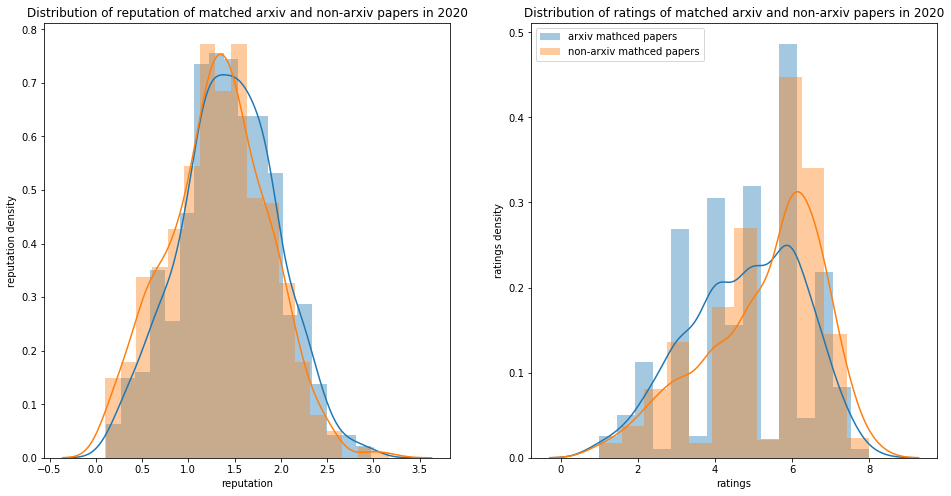

In [81]:
#Make plots
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.distplot(arxiv_paper_matched['reputation'], hist=True, label='arxiv matched papers',ax=axs[0]);
sns.distplot(nonarxiv_paper_matched['reputation'], hist=True, label='non-arxiv matched papers',ax=axs[0]);
sns.distplot(arxiv_paper_matched['ratings'], hist=True, label='arxiv mathced papers',ax=axs[1])
sns.distplot(nonarxiv_paper_matched['ratings'], hist=True, label='non-arxiv mathced papers',ax=axs[1])
axs[0].set(title='Distribution of reputation of matched arxiv and non-arxiv papers in 2020',xlabel='reputation', ylabel='reputation density')
axs[1].set(title='Distribution of ratings of matched arxiv and non-arxiv papers in 2020',xlabel='ratings', ylabel='ratings density')
plt.legend()
plt.show()

### Solution 3.3.2

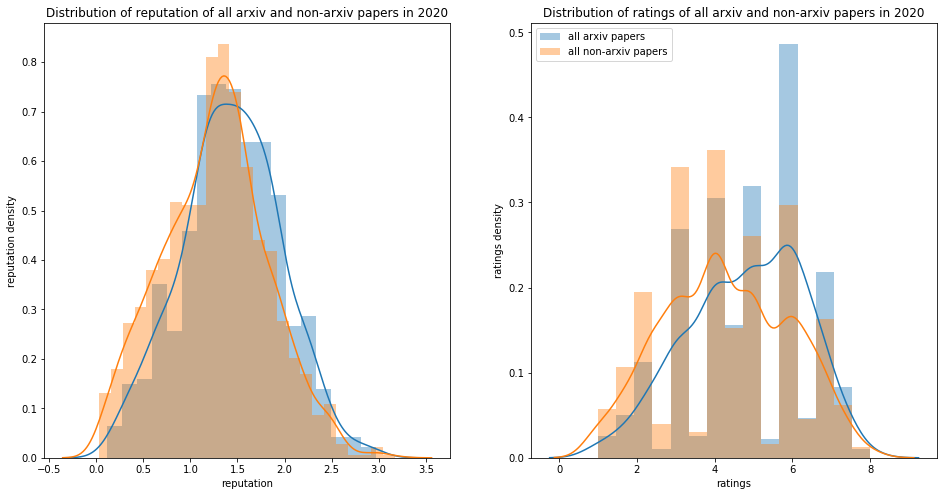

In [82]:
#Make plots
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.distplot(arxiv_paper_all['reputation'], hist=True, label='arxiv matched papers',ax=axs[0]);
sns.distplot(nonarxiv_paper_all['reputation'], hist=True, label='non-arxiv matched papers',ax=axs[0]);
sns.distplot(arxiv_paper_all['ratings'], hist=True, label='all arxiv papers',ax=axs[1])
sns.distplot(nonarxiv_paper_all['ratings'], hist=True, label='all non-arxiv papers',ax=axs[1])
axs[0].set(title='Distribution of reputation of all arxiv and non-arxiv papers in 2020',xlabel='reputation', ylabel='reputation density')
axs[1].set(title='Distribution of ratings of all arxiv and non-arxiv papers in 2020',xlabel='ratings', ylabel='ratings density')
plt.legend()
plt.show()

### Solution 3.3.3

For matched papers, the distribution for arxiv and non-arxiv paper (both ratings and reputation) has slight difference. For matched non-arxiv paper, they even have higher average ratings.
For all papers, we observe that the distribution of reputation is basically same between arxiv and non-arxive papers. However, for ratings, arxiv paper do have higher average ratings than non-arxiv paper.
Therefore, the matching work do help balance covariate.

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


### Solution 3.4

We consider each matched pairs. Each pair, we can calculate a treatment effect. Then the average treatment effect can be calculated.

In [93]:
te_array = np.zeros(int(len(match_dict)/2))
te_iter = 0

for i in arxiv_paper_matched.index:
    matched_index = match_dict[i]
    te_array[te_iter] = (arxiv_paper_matched.loc[i,'decisions'].astype(int) - nonarxiv_paper_matched.loc[matched_index,'decisions'].astype(int))
    te_iter = te_iter+1
    
ate_interval = bootstrap_CI(te_array,1000,0.95)

In [99]:
print("Estimate of ate:{:.4f}".format(te_array.mean()))
print("Confidence interval with 0.95 confidence:({:.4f},{:.4f})".format(ate_interval[0],ate_interval[1]))

Estimate of ate:-0.2492
Confidence interval with 0.95 confidence:(-0.2864,-0.2169)


### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

### Solution 3.5.1

#### Select top institution and repeat task 3.2

In [100]:
paper_2020_top_institution = merged_paper_2020.loc[merged_paper_2020['has_top_institution']==1].copy()

In [101]:
#Select all arxiv paper and non-arxiv paper
arxiv_paper = paper_2020_top_institution.loc[paper_2020_top_institution['arxiv']]['propensity_score']
nonarxiv_paper = paper_2020_top_institution.loc[~paper_2020_top_institution['arxiv']]['propensity_score']
epsilon = 0.05 

In [102]:
#Create edges list
#Put ever possible edge in the list
edges = []
for i in arxiv_paper.index:
    for j in nonarxiv_paper.index:
        weight = abs(arxiv_paper.loc[i]-nonarxiv_paper.loc[j])
        if weight<epsilon:
            edges.append((i,j))

In [103]:
G = nx.Graph()#Create graph

#Add nodes
G.add_nodes_from(arxiv_paper.index.values, bipartite=0)
G.add_nodes_from(nonarxiv_paper.index.values, bipartite=1)

#Add possible edges
G.add_edges_from(edges)

In [104]:
#do maxiumn matching
#Create a dictionary of matching
match_dict = nx.bipartite.maximum_matching(G)
print("number of pairs:{}".format(len(match_dict)/2))
print("number of unmatched:{}".format(len(nonarxiv_paper)-len(match_dict)/2))

number of pairs:161.0
number of unmatched:200.0


#### Repeat Task 3.3

In [105]:
#Create another column named 'matching'
#True and False
paper_2020_top_institution['matching'] = False

for i in paper_2020_top_institution.index:
    if i in match_dict.keys():
        paper_2020_top_institution.loc[i,'matching'] = True

In [106]:
arxiv_paper_matched = paper_2020_top_institution.loc[((paper_2020_top_institution['arxiv'])&(paper_2020_top_institution['matching']))]
nonarxiv_paper_matched = paper_2020_top_institution.loc[(paper_2020_top_institution['arxiv']==False)&(paper_2020_top_institution['matching'])]
arxiv_paper_all = paper_2020_top_institution.loc[paper_2020_top_institution['arxiv']]
nonarxiv_paper_all = paper_2020_top_institution.loc[~paper_2020_top_institution['arxiv']]

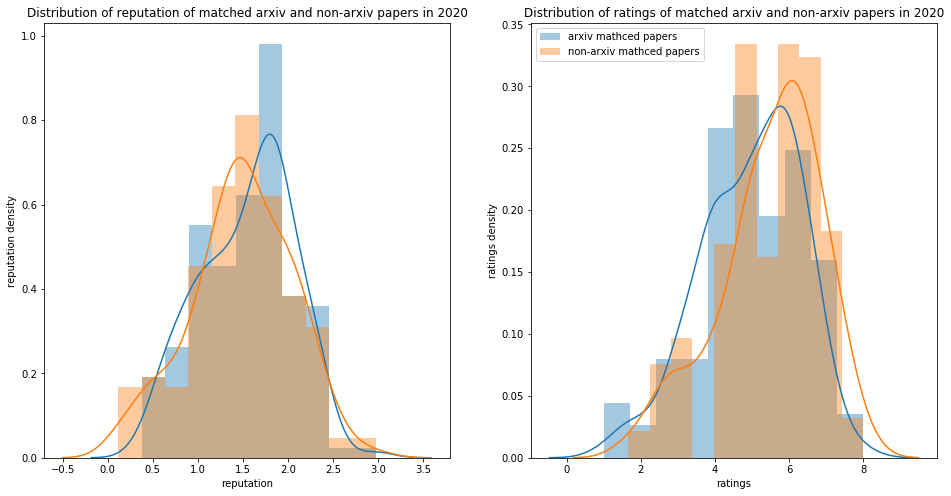

In [107]:
#Make plots
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.distplot(arxiv_paper_matched['reputation'], hist=True, label='arxiv matched papers',ax=axs[0]);
sns.distplot(nonarxiv_paper_matched['reputation'], hist=True, label='non-arxiv matched papers',ax=axs[0]);
sns.distplot(arxiv_paper_matched['ratings'], hist=True, label='arxiv mathced papers',ax=axs[1])
sns.distplot(nonarxiv_paper_matched['ratings'], hist=True, label='non-arxiv mathced papers',ax=axs[1])
axs[0].set(title='Distribution of reputation of matched arxiv and non-arxiv papers in 2020',xlabel='reputation', ylabel='reputation density')
axs[1].set(title='Distribution of ratings of matched arxiv and non-arxiv papers in 2020',xlabel='ratings', ylabel='ratings density')
plt.legend()
plt.show()

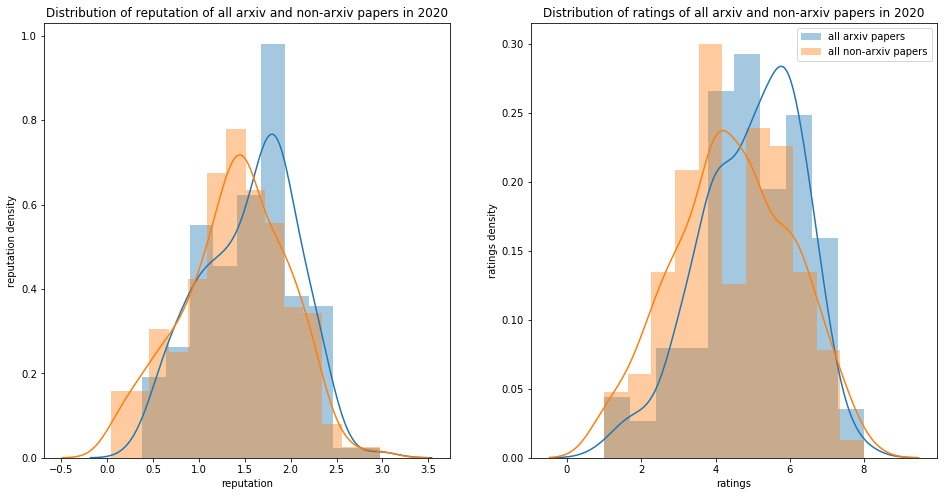

In [108]:
#Make plots
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.distplot(arxiv_paper_all['reputation'], hist=True, label='arxiv matched papers',ax=axs[0]);
sns.distplot(nonarxiv_paper_all['reputation'], hist=True, label='non-arxiv matched papers',ax=axs[0]);
sns.distplot(arxiv_paper_all['ratings'], hist=True, label='all arxiv papers',ax=axs[1])
sns.distplot(nonarxiv_paper_all['ratings'], hist=True, label='all non-arxiv papers',ax=axs[1])
axs[0].set(title='Distribution of reputation of all arxiv and non-arxiv papers in 2020',xlabel='reputation', ylabel='reputation density')
axs[1].set(title='Distribution of ratings of all arxiv and non-arxiv papers in 2020',xlabel='ratings', ylabel='ratings density')
plt.legend()
plt.show()

#### Repeat Task 3.4

In [109]:
te_array = np.zeros(int(len(match_dict)/2))
te_iter = 0

for i in arxiv_paper_matched.index:
    matched_index = match_dict[i]
    te_array[te_iter] = (arxiv_paper_matched.loc[i,'decisions'].astype(int) - nonarxiv_paper_matched.loc[matched_index,'decisions'].astype(int))
    te_iter = te_iter+1
    
ate_interval = bootstrap_CI(te_array,1000,0.95)

In [110]:
print("Estimate of ate:{:.4f}".format(te_array.mean()))
print("Confidence interval with 0.95 confidence:({:.4f},{:.4f})".format(ate_interval[0],ate_interval[1]))

Estimate of ate:-0.1925
Confidence interval with 0.95 confidence:(-0.2857,-0.1056)


### Solution 3.5.2

We believe this is the evidence that arxiv breaks double-blind submissions. Because for all papers, non-arxiv papers and arxiv papers differ from each other a lot in the distribution of ratings. However, for matched papers, their distribution of ratings differ slightly from each other.